In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
path1 = "/home/workspace/K-Alzheimer/ALL_DATASETS/dataset_adni_transposed/AD/I359781.npz"
path2 = "/home/workspace/K-Alzheimer/ALL_DATASETS/dataset_adni_good/AD/I359781.npz"
npz = np.load(path2)

(224, 224) 0 212
(224, 224) 0 199
(224, 224) 0 204


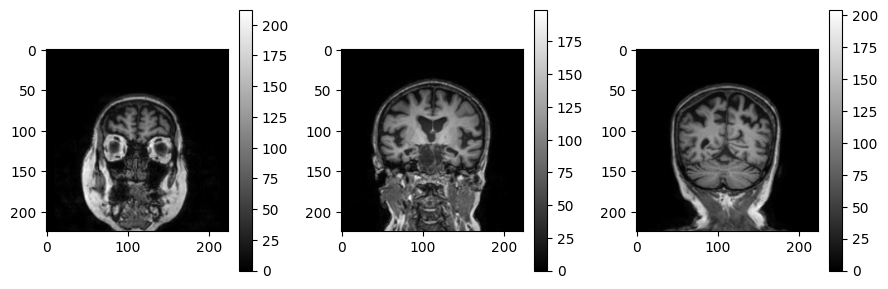

In [15]:
target_volume = npz["volume"]

frame0, frame1, frame2 = target_volume[60], target_volume[112], target_volume[159]

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

for i, frame in enumerate([frame0, frame1, frame2]):
    print(frame.shape, np.min(frame), np.max(frame))
    im = axes[i].imshow(frame, cmap="gray")
    plt.colorbar(im)

plt.tight_layout()
plt.show()

In [ ]:
import cv2

for idx, data in enumerate([(96, 96 + 32, 1), (80, 80 + 64, 2), (64, 64 + 96, 2)]):
    fps = 10
    h, w = 224, 224
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(f"output_{idx+1}mm_32_slices.mp4", fourcc, fps, (w, h), isColor=False)

    count = 0
    for idx in range(*data):
        count += 1
        frame = target_volume[idx]
        frame_uint8 = np.clip(frame, 0, 1) * 255 if frame.dtype == float else frame
        frame_uint8 = frame_uint8.astype(np.uint8)
        out.write(frame_uint8)

    out.release()
    print("saved", count)